# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **sports or athletics** (see below) for the region of **Brisbane, Queensland, Australia**, or **Australia** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Brisbane, Queensland, Australia** to Ann Arbor, USA. In that case at least one source file must be about **Brisbane, Queensland, Australia**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Brisbane, Queensland, Australia** and **sports or athletics**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **sports or athletics**?  For this category we are interested in sporting events or athletics broadly, please feel free to creatively interpret the category when building your research question!

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

<IPython.core.display.Javascript object>


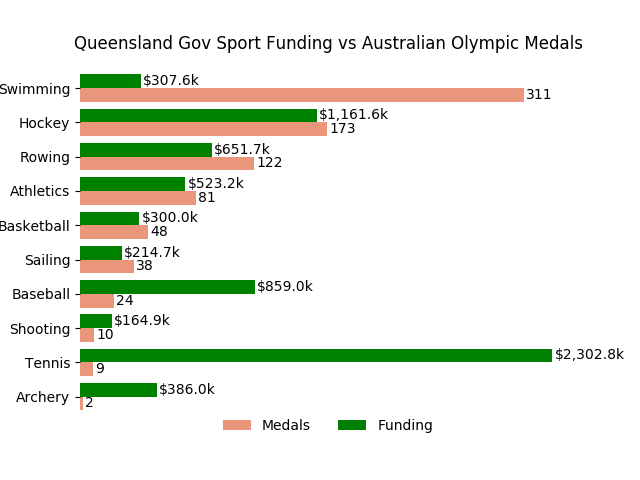

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

# The funding information is spread across 4 spreadsheets. Not all columns are required
# The following lists are the column headings to use
col_headings_funding = ['Client Name', 'Description', 'Status', 'Activity', 
                        'Date Approved', 'Amount', 'Location', 'Electorate', 'LGA', 'Region']

#The following are the columns to be loaded from the funding spreadsheets
xlsx_columns_funding=[2,3,4,5,6,7,9,10,11,12]

#The following code loads 4 funding Excel Spreadsheets  of funding information
srip_r1_app_funding = pd.read_excel(open('srip-round1-approved-funding.xlsx','rb'), sheetname='F-03 data', 
                                   usecols=xlsx_columns_funding, names=col_headings_funding)
srip_r2_app_funding = pd.read_excel(open('srip-round2-approved-funding.xlsx','rb'), sheetname='F-036 data', 
                                   usecols=xlsx_columns_funding, names=col_headings_funding)
srip_r3_app_funding = pd.read_excel(open('srip-round3-cat1-approved-funding.xlsx','rb'), sheetname='F-040 data', 
                                   usecols=xlsx_columns_funding, names=col_headings_funding)
srip_r4_app_funding = pd.read_excel(open('srip-round3-cat2-approved-funding.xlsx','rb'), sheetname='F-041 data', 
                                   usecols=xlsx_columns_funding, names=col_headings_funding)

# The funding spreadsheets are combined in a single Dataframe srip_app_funding
srip_app_funding = srip_r1_app_funding.copy()
srip_app_funding = srip_app_funding.append(srip_r2_app_funding)
srip_app_funding = srip_app_funding.append(srip_r3_app_funding)
srip_app_funding = srip_app_funding.append(srip_r4_app_funding)

# The sport names/discipline are not standard across all funding and medal spreadsheets. 
# When the funding dataframe as the following values replaced.
to_replace_medals = ['Artistic G.', 'Dressage']
to_replace_funding =['BMX Bicycle Motocross', 'Soccer','Rugby Union','Rugby League', 'Shooting Clay Target', 
                     'Shooting Rifle', 'Shooting Sporting']
value_funding = ['BMX','Football', 'Rugby', 'Rugby', 'Shooting', 'Shooting', 'Shooting']

srip_app_funding['Activity'] = (srip_app_funding['Activity']
                               .replace(to_replace=to_replace_funding, value=value_funding)
                               .str.strip())

#A new DataFrame is created from the funding DataFrame. The new Dataframe is grouped
#by the Activity and the funding values is sumed for that activtity.
grouped_funding = srip_app_funding.groupby('Activity', as_index=False).sum()


# Not all columns are required from the medal spreadsheet
# The following lists are the column headings to use and the columns to be loaded
col_headings_medals = ['Sport', 'Discipline', 'NOC', 'Event', 'Medal']
xlsx_columns_medals=[2,3,5,7,9]

#The following code loads the medal Excel Spreadsheets. It skips the first 4 rows of data
medal_table = pd.read_excel(open('Summer Olympic medallists 1896 to 2008.xlsx','rb'), sheetname='ALL MEDALISTS', 
                                   usecols=xlsx_columns_medals, names=col_headings_medals, skiprows=4)

# The dataframe is then filtered to only those medals won by Australia
medal_table = medal_table[medal_table['NOC'] == 'AUS']

# The sport names/discipline are not standard across all funding and medal spreadsheets. 
# When the medal spreadsheets are loaded the follow values are replaced.
to_replace_medals = ['Artistic G.', 'Dressage']
value_medals = ['Gymnastics', 'Equestrian']
                     
medal_table['Discipline'] = (medal_table['Discipline']
                            .replace(to_replace=to_replace_medals, value=value_medals)
                            .str.strip())

#A new DataFrame is created from the funding medal DataFrame. The new Dataframe is grouped
#by the discipline and the medal values is sumed for that discipline.
grouped_medal = medal_table.groupby('Discipline', as_index=False).count()
grouped_medal = grouped_medal.drop(grouped_medal.columns[[1, 2, 3]], axis=1)

#The two Dataframes of grouped and sumed data are mergered  into a single DataFrame
combined_df = pd.merge(grouped_medal, grouped_funding, how='inner', left_on='Discipline', right_on='Activity')

#Two new columns are created of normalised values for the sumed funding and medal values.
#These two new columns will be used to plot the values. The values are normalised to account
#for the range of values between the funding and medals values.
combined_df['normalised medal'] = ((1)/(max(combined_df['Medal']-min(combined_df['Medal'])))
                                  *(combined_df['Medal']-max(combined_df['Medal']))
                                  +(1+(min(combined_df['Medal'])/(max(combined_df['Medal'])))))
combined_df['normalised amount'] = ((1)/(max(combined_df['Amount']-min(combined_df['Amount'])))
                                  *(combined_df['Amount']-max(combined_df['Amount']))
                                  +(1+(min(combined_df['Amount'])/(max(combined_df['Amount'])))))
                                    
                                

# The is method formats a values as currency in 1000's of dollars
def formay(x):
    return "${:,.1f}k".format((x/1000))

# The Amount column is formatted as dollars
combined_df['Amount'] = combined_df['Amount'].apply(formay)

#the DataFrame is sorted by the medals value
combined_df = combined_df.sort_values('Medal', ascending=[True])

fig = plt.figure()
ax = fig.add_subplot(111)

#Creates a list that will be used as the yvals on the barchart
ind = np.arange(len(combined_df.index))
#Width of each bar on the barchart
width = 0.4

#this second of code create two lists of values that will be plotted
#as the bars on the barchart. The barchart used the barh for a horizontal
#barchart
xvals_medals = combined_df['normalised medal'].tolist()
rects1 = ax.barh(ind, xvals_medals, width, color='darksalmon')
xvals_ammount = combined_df['normalised amount'].tolist()
rects2 = ax.barh(ind+width, xvals_ammount, width, color='g')

#The code place the bar ticks in the middle of the bars
ax.set_yticks(ind+width-0.2)
ax.set_yticklabels( combined_df['Discipline'] )

# Creates and place the legend at the bottom of the barchart
ax.legend( (rects1[0], rects2[0]), ('Medals', 'Funding'), frameon=False, 
         bbox_to_anchor=(0.5, -0.05), loc='lower center', ncol=2)

#Makes the plot ticks invisible
ax.tick_params(axis='x',which='both',bottom='off', top='off', labelbottom='off')

#Inserts a plot title
plt.title('Queensland Gov Sport Funding vs Australian Olympic Medals')

#Makes the plot axes invisible
for spine in plt.gca().spines.values():
    spine.set_visible(False)

#Function to add the values as labels to the bars    
def autolabel(rects, labels):
    i = 0
    for rect in rects:
        w = rect.get_width()
        ax.text(w+0.005, rect.get_y(), labels[i],
                ha='left', va='bottom')
        i = i+1

#Calls the autolabel function to add the labesl for the Medal and Label amouns
autolabel(rects1, combined_df['Medal'].tolist())
autolabel(rects2, combined_df['Amount'].tolist())